In [14]:
import numpy as np
import pandas as pd

import sys
sys.path.insert(0,r'/home/markus/repos/uni/16ma/bicycle/python')
from models.load_data_set import load_data_set
from bicycle.plot_bicycle_trajectories import position, state

In [2]:
import holoviews as hv

hv.notebook_extension()
%output holomap='auto' widgets='embed'
%output size=150 dpi=120
%opts NdOverlay[show_grid=True show_title=False show_legend=False]

In [4]:
train_set_path = r"/home/markus/repos/uni/16ma/bicycle/evals/21/data/evaluation_set/train/train.xa"
train_set = load_data_set(train_set_path)

In [5]:
tbl = hv.Table(train_set, kdims=["episode", "step"])

b':Distribution   (length)'
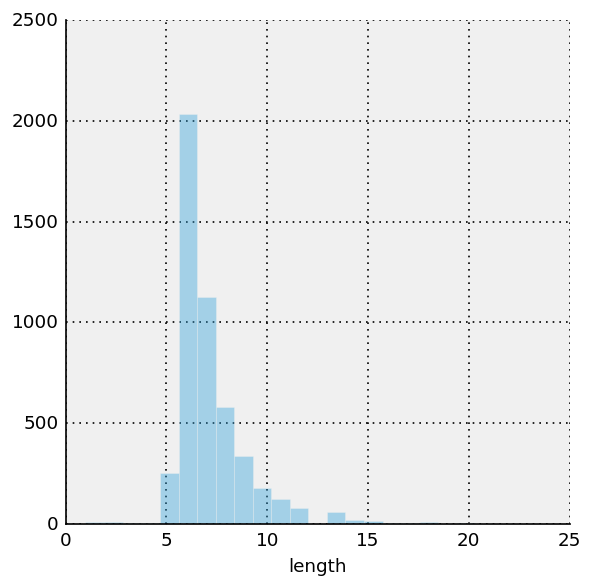

In [6]:
%%output filename="data_set_length_histogram" fig="png"
%%opts Distribution (kde=False, bins=25)
hv.Table(train_set.groupby("episode").count().iloc[::2]["step"], kdims=["episode"], vdims=["length"]).to.distribution("length")

In [7]:
train_set[train_set["step"] >= 15]["episode"].unique()

array([  118.,   119.,   428.,   429.,   566.,   567.,   600.,   601.,
         668.,   669.,  1084.,  1085.,  1962.,  1963.,  1974.,  1975.,
        2120.,  2121.,  2130.,  2131.,  2372.,  2373.,  2394.,  2395.,
        2434.,  2435.,  2464.,  2465.,  3076.,  3077.,  3094.,  3095.,
        3290.,  3291.,  4062.,  4063.,  4158.,  4159.,  4860.,  4861.,
        5478.,  5479.,  5612.,  5613.,  6508.,  6509.,  6662.,  6663.,
        7772.,  7773.,  7808.,  7809.,  8648.,  8649.,  8860.,  8861.])

b':HoloMap   [episode]\n   :Curve   [step]   (next_omega)'
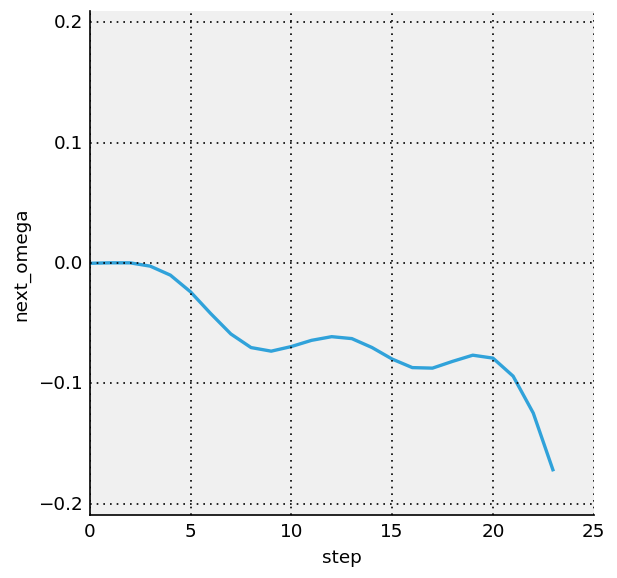

In [8]:
%%output filename="data_set_omega_plot" fig="png"
tbl.select(episode=6662).to.curve("step", "next_omega", extents=(0,-np.pi/15, 25, np.pi/15))

b':NdOverlay   [Start State]\n   :Points   [x,y]'
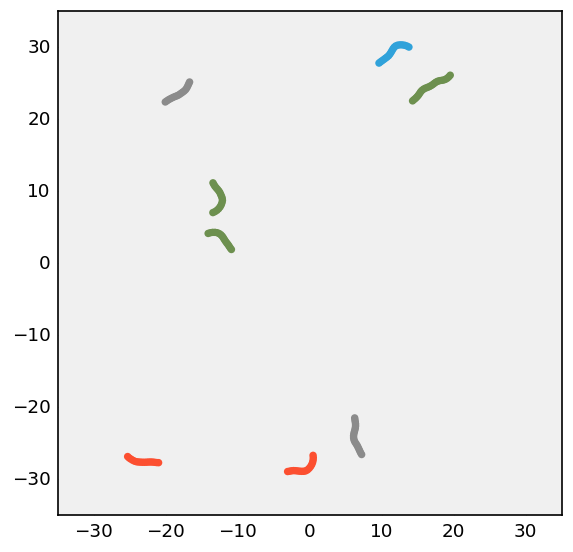

In [15]:
%%output filename="data_set_positions" fig="png"

long_episodes = np.array([  118.,   119.,   428.,   429.,   566.,   567.,   600.,   601.,
         668.,   669.,  1084.,  1085.,  1962.,  1963.,  1974.,  1975.,
        2120.,  2121.,  2130.,  2131.,  2372.,  2373.,  2394.,  2395.,
        2434.,  2435.,  2464.,  2465.,  3076.,  3077.,  3094.,  3095.,
        3290.,  3291.,  4062.,  4063.,  4158.,  4159.,  4860.,  4861.,
        5478.,  5479.,  5612.,  5613.,  6508.,  6509.,  6662.,  6663.,
        7772.,  7773.,  7808.,  7809.,  8648.,  8649.,  8860.,  8861.])
long_episodes = long_episodes[::2]

trajectories = [train_set[train_set["episode"] == episode] for episode in long_episodes]
allpositions = {
    i: position(trajectory)
    for i, trajectory in enumerate(trajectories)
}
hv.NdOverlay(allpositions, kdims=["Start State"])

In [18]:
episode = tbl.select(episode=6662).data
episode.to_csv("solution_data_omega.dat")

In [30]:
lengths = hv.Table(train_set.groupby("episode").count().iloc[::2]["step"], kdims=["episode"], vdims=["length"]).data
lengths = pd.DataFrame(lengths[:, 1], columns=["length"])
lengths = lengths.groupby("length").size()
lengths.to_csv("solution_data_lengths.dat")

In [37]:
for i, trajectory in enumerate(trajectories):
    trajectory.to_csv("solution_xy_trajectories_data_{}.xa".format(i), sep=' ', index=False)